In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
print('pandas version', pd.__version__)
print('seaborn version', sns.__version__)
import matplotlib; print('matplotlib version', matplotlib.__version__)

pandas version 2.2.2
seaborn version 0.13.2
matplotlib version 3.8.4


### YouTube statistics

In [89]:
# make dataframe from excel sheet
youtube_fpath = os.path.join('views_per_video_YouTube_0503.xlsx')
youtube_df = pd.read_excel(youtube_fpath, )

# custom order – 'Roundtable & other' should be last
ordered_categories = ['Educational', 'Keynote', 'Oral', 'Symposium', 'Roundtable & other']
youtube_df['Category'] = pd.Categorical(youtube_df.Category, 
                                        categories=ordered_categories, 
                                        ordered=True)
youtube_df.sort_values('Category', inplace=True)


In [90]:
# check the dataframe
youtube_df.head()

,Metric,Year,Category,Value
36,views per video,2023,Educational,82.145161
1,videos,2024,Educational,74.000000
31,views per video,2024,Educational,79.067568
26,views,2022,Educational,2285.000000
41,views per video,2022,Educational,31.301370


In [91]:
# create separate video and view dataframes
vid_df = youtube_df[youtube_df.Metric=='videos']
view_df = youtube_df[youtube_df.Metric=='views']

In [92]:
vid_df.head()

,Metric,Year,Category,Value
1,videos,2024,Educational,74.0
6,videos,2023,Educational,62.0
11,videos,2022,Educational,73.0
0,videos,2024,Keynote,8.0
10,videos,2022,Keynote,8.0


In [93]:
vid_df.Category.unique()

['Educational', 'Keynote', 'Oral', 'Symposium', 'Roundtable & other']
Categories (5, object): ['Educational' < 'Keynote' < 'Oral' < 'Symposium' < 'Roundtable & other']

In [94]:
view_df.head()

,Metric,Year,Category,Value
26,views,2022,Educational,2285.0
21,views,2023,Educational,5093.0
16,views,2024,Educational,5851.0
25,views,2022,Keynote,664.0
20,views,2023,Keynote,1291.0


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_20675/2239822288.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = vid_df.pivot_table(index=['Year', 'Category'],


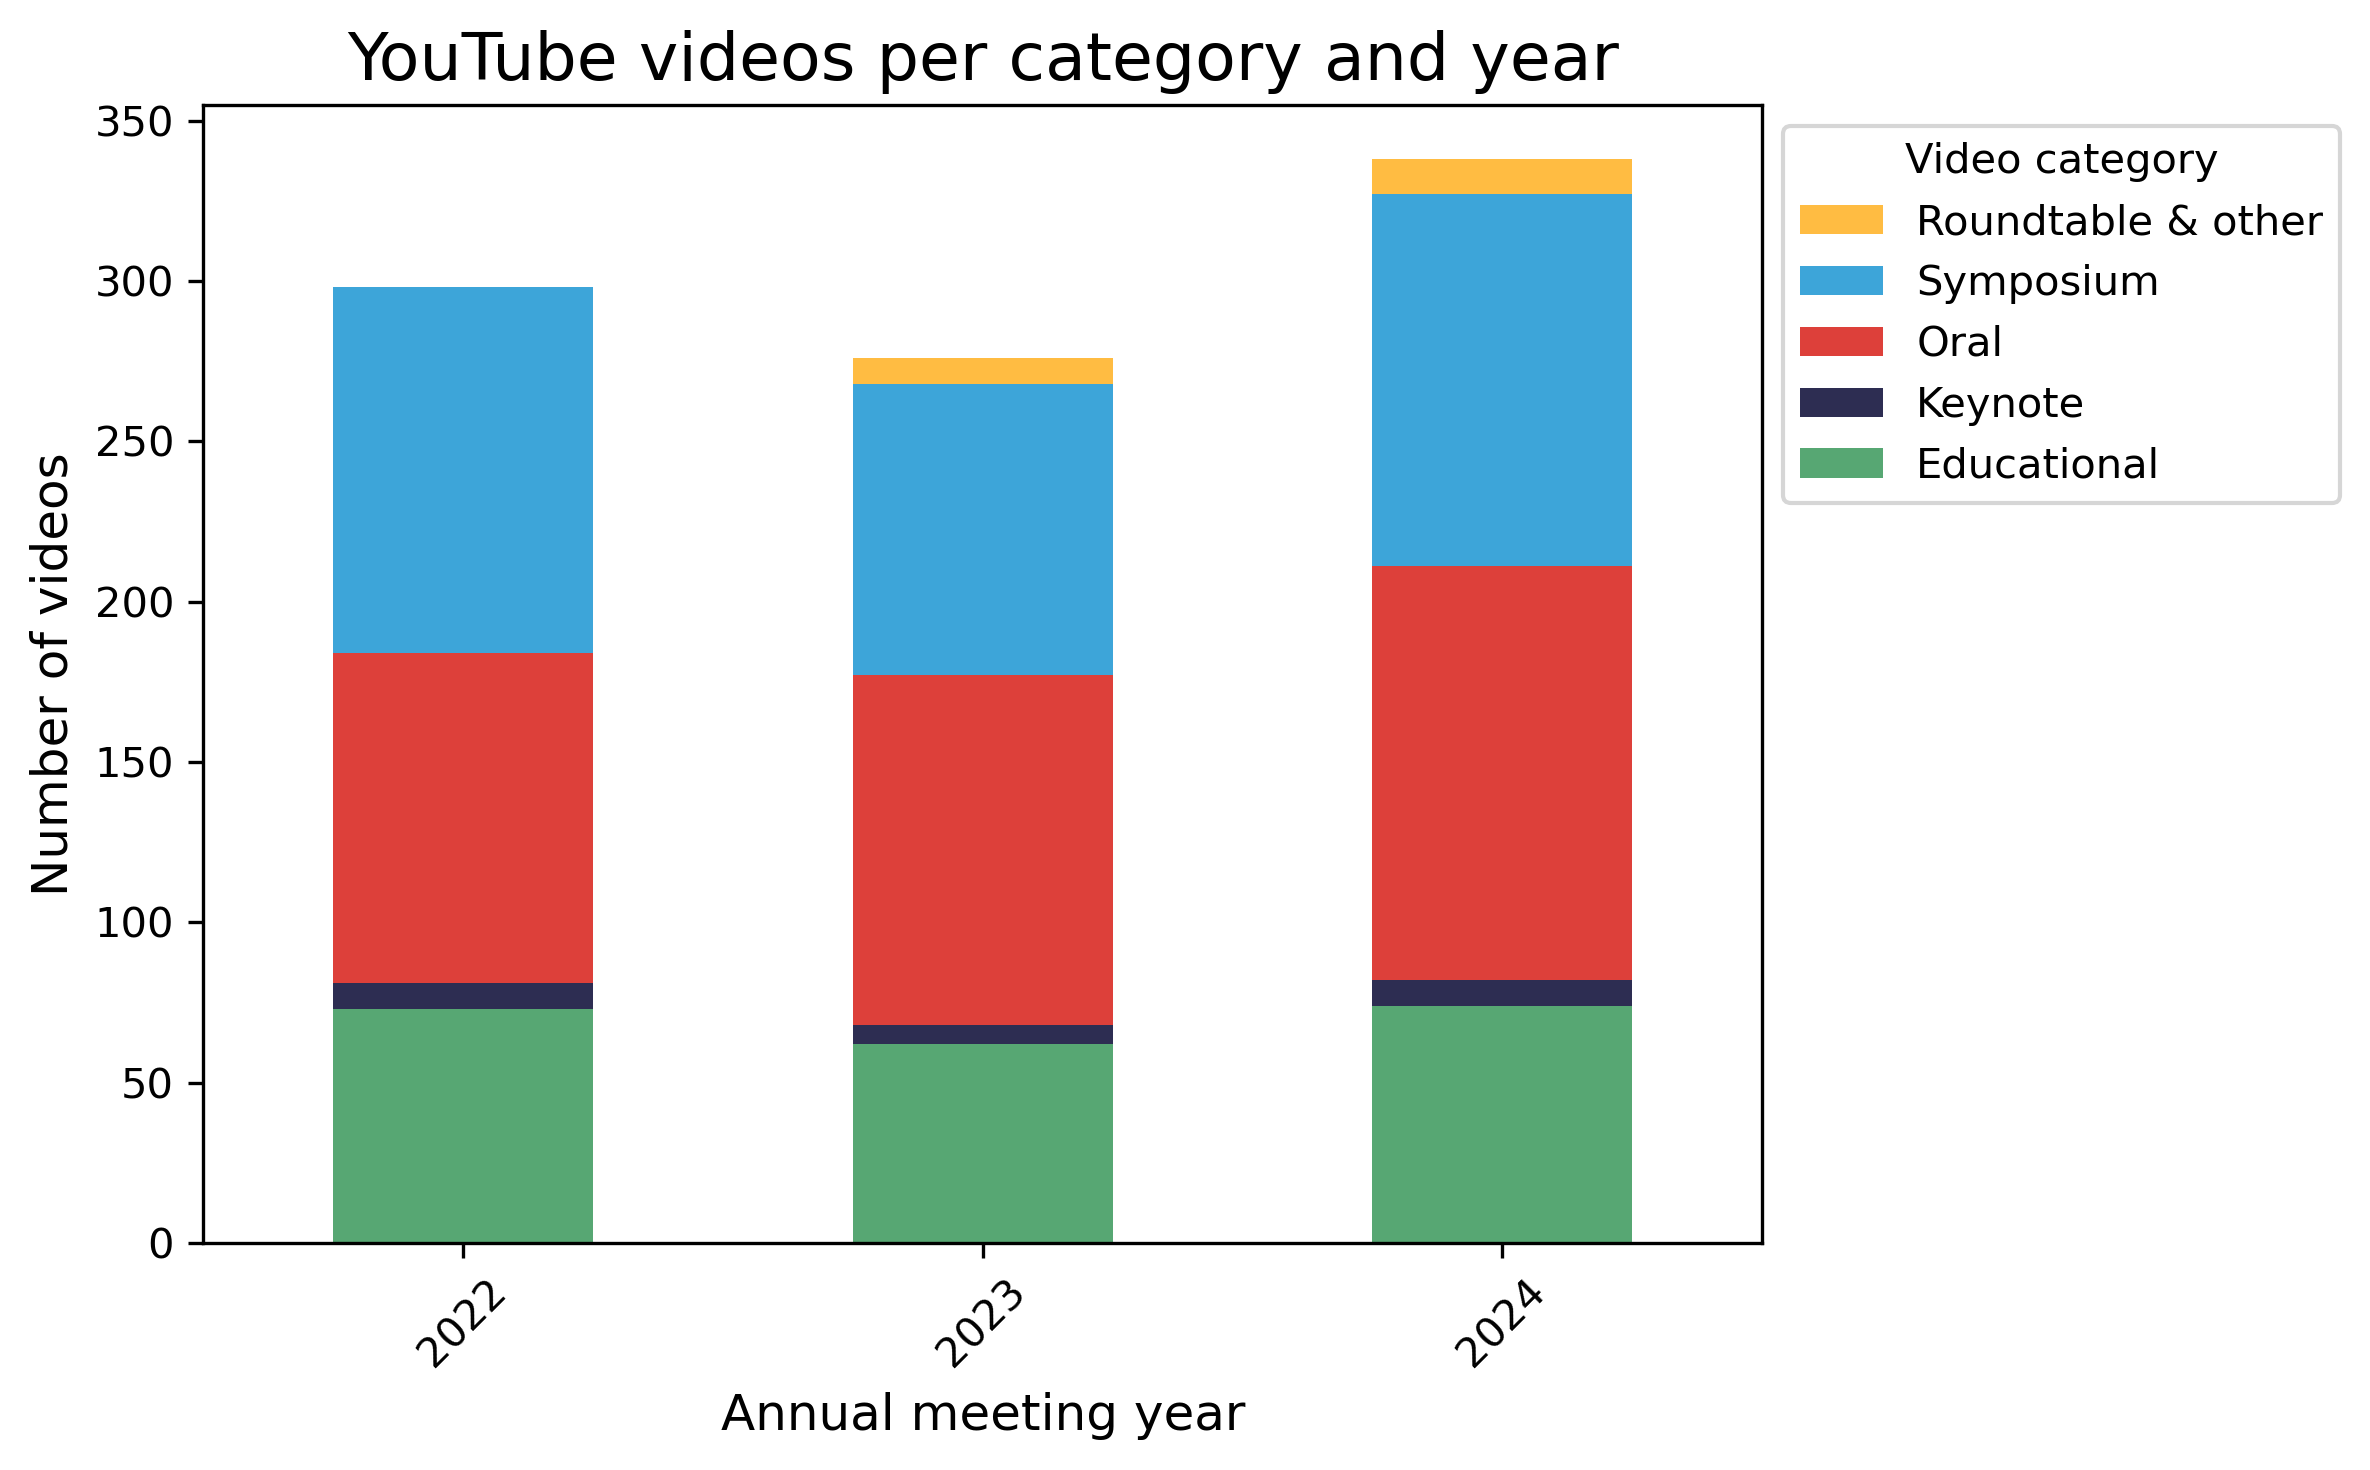

In [95]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8,5))

# Pivot the data so that each Metric becomes a column for each Category/Year
df_pivot = vid_df.pivot_table(index=['Year', 'Category'], 
                              columns='Metric', 
                              values='Value', 
                              aggfunc='sum')

# Plot a stacked bar chart
custom_colors = ['#57A773', '#2D2D52', 
                 '#DD403A', '#3DA5D9', '#FFBC42']  # Darkened CUD colors
df_pivot.unstack(level=1).plot(kind='bar', 
                                    stacked=True, 
                                    #figsize=(10, 6), 
                                    color=custom_colors,
                                    ax=ax
                                    )


# Customize the plot
ax.set_xlabel('Annual meeting year', fontsize=12)
ax.set_ylabel('Number of videos', fontsize=12)
ax.set_title('YouTube videos per category and year', fontsize=16)
plt.xticks(rotation=45)

# Get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Flatten MultiIndex column names to extract only the 'Category' part
clean_labels = [label.split(", ")[1].strip("()") for label in labels]  # Extract only the category

# Update the legend with the cleaned-up labels
ax.legend(handles[::-1], clean_labels[::-1], 
          loc='upper left', bbox_to_anchor=(1, 1), 
          title="Video category")

plt.tight_layout()

#plt.show()

fig.savefig('TimeMachine_videos_0504.svg')
fig.savefig('TimeMachine_videos_0504.png')

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_20675/2633451854.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = view_df.pivot_table(index=['Year', 'Category'],


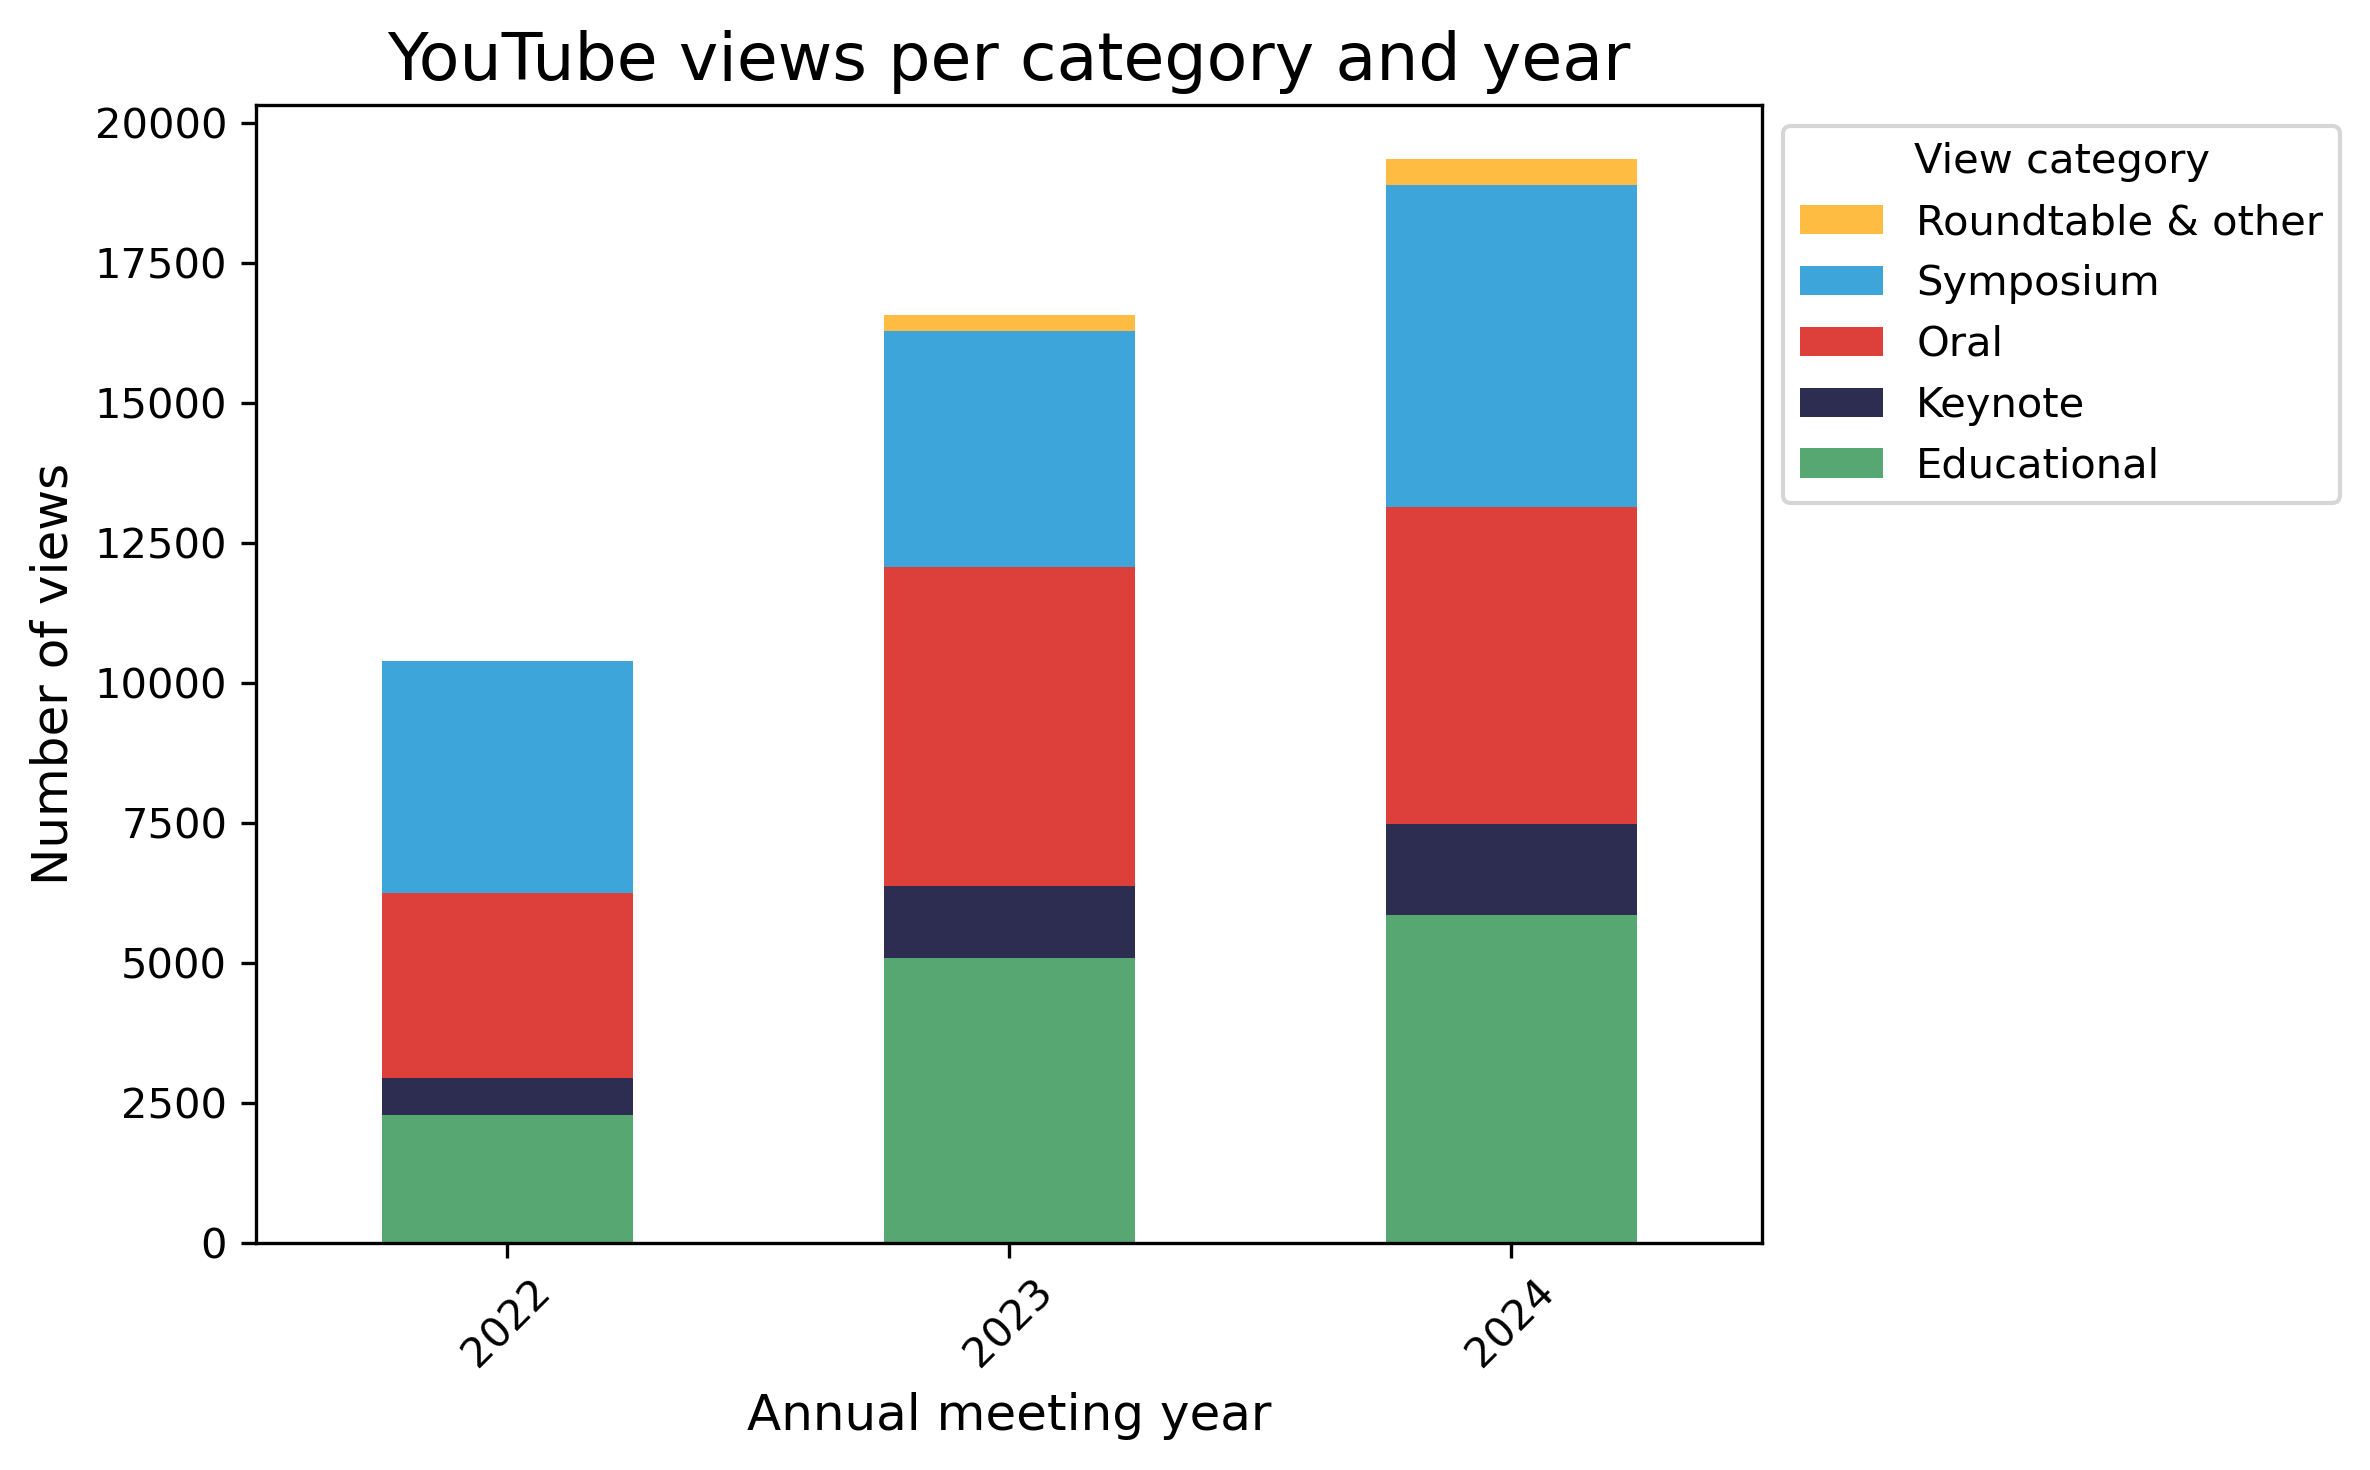

In [96]:
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8,5))

# Pivot the data so that each Metric becomes a column for each Category/Year
df_pivot = view_df.pivot_table(index=['Year', 'Category'], 
                              columns='Metric', 
                              values='Value', 
                              aggfunc='sum')

# Plot a stacked bar chart
custom_colors = ['#57A773', '#2D2D52', 
                 '#DD403A', '#3DA5D9', '#FFBC42']  # Darkened CUD colors
df_pivot.unstack(level=1).plot(kind='bar', 
                                    stacked=True, 
                                    #figsize=(10, 6), 
                                    color=custom_colors,
                                    ax=ax
                                    )


# Customize the plot
ax.set_xlabel('Annual meeting year', fontsize=12)
ax.set_ylabel('Number of views', fontsize=12)
ax.set_title('YouTube views per category and year', fontsize=16)
plt.xticks(rotation=45)

# Get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Flatten MultiIndex column names to extract only the 'Category' part
clean_labels = [label.split(", ")[1].strip("()") for label in labels]  # Extract only the category

# Update the legend with the cleaned-up labels
ax.legend(handles[::-1], clean_labels[::-1], 
          loc='upper left', bbox_to_anchor=(1, 1), 
          title="View category")

plt.tight_layout()

#plt.show()

fig.savefig('TimeMachine_views_0504.svg')
fig.savefig('TimeMachine_views_0504.png')

### (not published) OnDemand statistics

In [3]:
ondemand_fpath = os.path.abspath('OnDemandCourses 2014-05-08 - 2024-10-14.csv')

In [ ]:
ondemand_df = pd.read_csv(ondemand_fpath, header=28)
ondemand_df.dropna(axis=1, inplace=True)

In [5]:
ondemand_df

,Year,User visits,Item Amount,Visits/Video
0,2022,1200,150,8.0
1,2021,3152,199,15.8
2,2020,2523,85,29.7
3,2019,1721,328,5.2
4,2018,1119,267,4.2
5,2017,3888,313,12.4
6,2016,3052,285,10.7
7,2015,796,190,4.2
8,2014,155,175,0.9
9,2013,214,176,1.2


<Axes: xlabel='Year', ylabel='Visits/Video'>

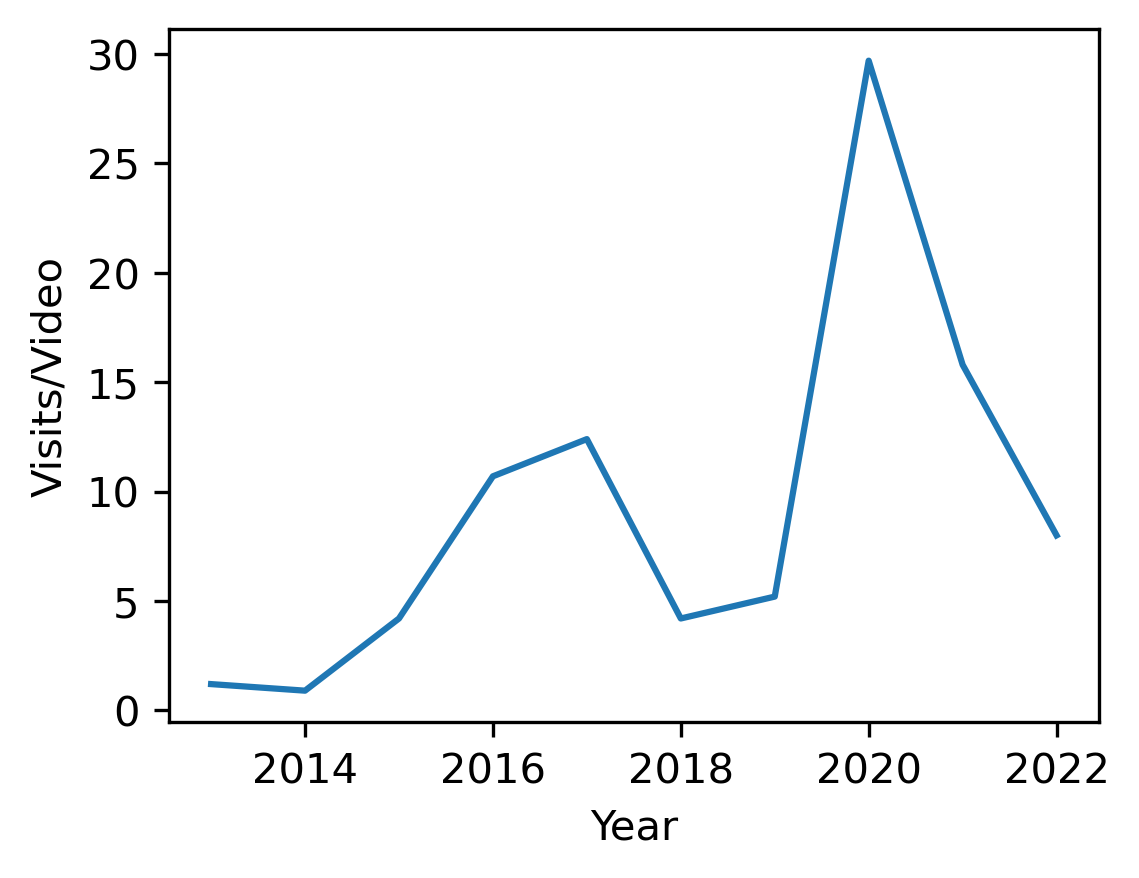

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi=300)
sns.lineplot(data=ondemand_df, 
             x=ondemand_df['Year'], 
             y=ondemand_df['Visits/Video'])

<Axes: xlabel='Year', ylabel='Item Amount'>

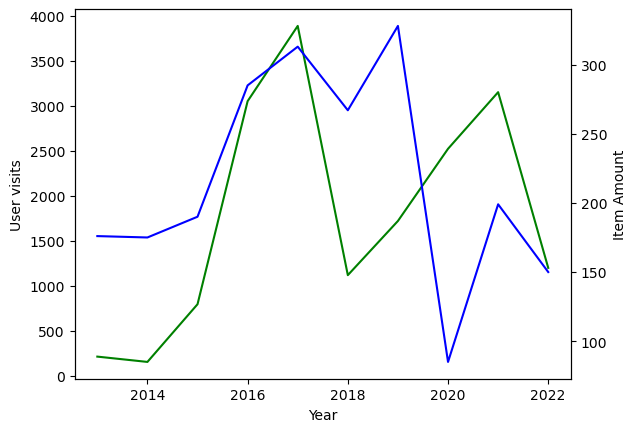

In [7]:
sns.lineplot(data=ondemand_df, 
             x=ondemand_df['Year'], 
             y=ondemand_df['User visits'], color="g")
ax2 = plt.twinx()
sns.lineplot(data=ondemand_df, 
             x=ondemand_df['Year'], 
             y=ondemand_df['Item Amount'], color="b", ax=ax2)